# Proyecto 1. Estadística Descriptiva, Estimación y Prueba de Hipótesis

## 1. De acuerdo a su set de datos*:

a) Utilice los Estadísticos Descriptivos estudiados en la Conferencia 1. Para
describir el comportamiento de tres de sus variables. Seleccione las que
sean más importantes y explique porque seleccionó estas.

b) Para cada muestra calcule los intervalos de confianza para la media y la
varianza**

c) Grafique los resultados***.

d) Interprete los resultados en términos del problema.


In [19]:
# Import neccesary libraries
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('yatch.csv')
df.head()

,ID,LongPosition,PrismCoeff,LengthDispRatio,BeamDraughtRatio,LengthBeamRatio,FroudeNumber,ResiduaryResistance
0,1,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,2,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,3,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,4,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,5,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [21]:
df.describe()

,ID,LongPosition,PrismCoeff,LengthDispRatio,BeamDraughtRatio,LengthBeamRatio,FroudeNumber,ResiduaryResistance
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,154.500000,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,89.056162,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,1.000000,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,77.750000,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,154.500000,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,231.250000,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,308.000000,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


In [22]:
# LongPosition
var_name = 'LongPosition'
num_class = 11

min_value = df[var_name].min()
max_value = df[var_name].max()
bins = np.linspace(min_value, max_value, num_class) 
labels = []
for i in range(len(bins) - 1):
    labels.append(f"[{bins[i]:.2f}, {bins[i+1]:.2f}]")

(array([196.,   0.,   0.,   0.,   0.,  56.,   0.,   0.,   0.,   0.,  56.]),
 array([0.        , 0.18181818, 0.36363636, 0.54545455, 0.72727273,
        0.90909091, 1.09090909, 1.27272727, 1.45454545, 1.63636364,
        1.81818182, 2.        ]),
 <BarContainer object of 11 artists>)

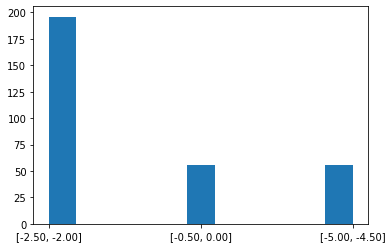

In [24]:

df[f'{var_name}_bins'] = pd.cut(df[var_name], bins=bins, labels=labels, include_lowest=True)
import matplotlib.pyplot as plt
plt.hist(df[f'{var_name}_bins'], bins=len(bins))

In [27]:
absolute_df = df[var_name].groupby(df[f'{var_name}_bins']).count()
frecuency_df = df[var_name].groupby(df[f'{var_name}_bins']).count()/df.shape[0]

<AxesSubplot:xlabel='LongPosition_bins'>

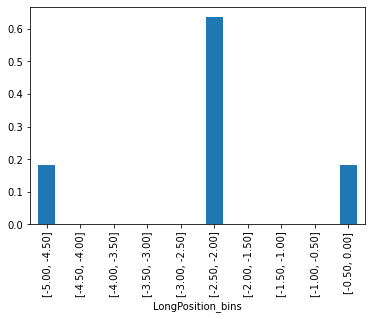

In [28]:
frecuency_df.plot(kind='bar')